# Perceptron

## What is Perceptron ? 

* A Perceptron is the most basic unit of a neural network — a mathematical model inspired by biological neurons.

* In a Multi-Layer Neural Network, each unit (neuron) is essentially a perceptron.

* A perceptron takes inputs, multiplies them with weights, adds a bias, and produces an output.

* Perceptrons only work well with linearly separable data.

## Geometric View

* Linear in 2D

* Plane in 3D

* Hyperplane in 4D

## Perceptron as a Model (Modern Perceptron):
  | Problem Type | Activation Function | Loss Function |
  |--------------|---------------------|---------------|
  |Binary Classifier|Sigmod             | Binary Cross Entropy |
  |Multi-Class Classifier| Softmax      | categoricl Cross Entropy|
  |regressor | No activation(Linear)   | MSE, L1Loss, HubleLoss|

## Limitations of Perceptron
1. No quantification of “best” line

    * Multiple lines can separate the data.
        
    * Perceptron alone cannot say which is optimal.
        
    * This is solved using **Loss Functions**.

2. Fails on non-linear data 

    * Example: XOR problem.
    
    * Can be solved by stacking perceptrons into a **Multi-Layer Perceptron (MLP)** with non-linear activations.
  

# Practical Implementation of Perceptron using nn Module
 So,It is also called binary classifier because I am using both Sigmoid function and Binary Cross Entropy.

 **classic Perceptron uses Step Function and Perceptron rule (error x input)**

In [1]:
# Importing Libraries
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim

In [2]:
# Creating a dataset using make_classification .

x, y =  make_classification(
    n_samples = 100, 
    n_features = 2, 
    n_informative = 2, 
    n_redundant = 0,
    n_classes = 2,
    random_state = 30)

In [3]:
x.shape

(100, 2)

In [4]:
y.shape

(100,)

In [5]:
# Converting it to dataframe to amke plotting easy

df = pd.DataFrame(x,columns = ['Feature1','Feature2'])
df['Target'] = y

df.head()

,Feature1,Feature2,Target
0,-0.496608,-0.046681,0
1,-0.617475,-1.984590,0
2,1.796346,-1.674991,0
3,0.993001,-1.086699,0
4,-0.137315,-0.749315,0


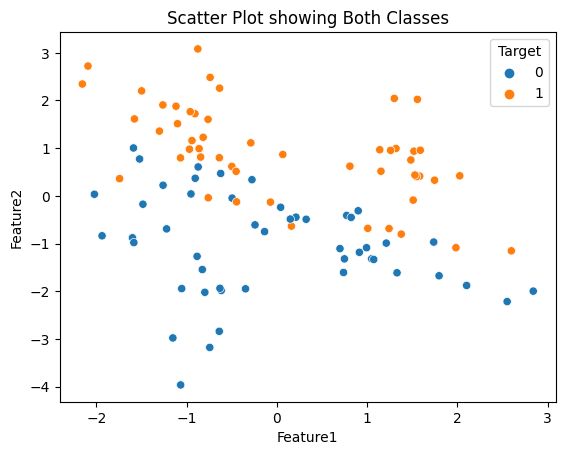

In [6]:
# scatter plot for classification view

sns.scatterplot(data = df, x = 'Feature1', y = 'Feature2', hue = 'Target')
plt.title("Scatter Plot showing Both Classes")
plt.show()

In [7]:
# Splitting the data 
x = df.iloc[:,0:2]
y = df['Target']

In [8]:
x

,Feature1,Feature2
0,-0.496608,-0.046681
1,-0.617475,-1.984590
2,1.796346,-1.674991
3,0.993001,-1.086699
4,-0.137315,-0.749315
...,...,...
95,0.147861,-0.486107
96,-0.452683,0.513960
97,-0.876854,3.081148
98,-0.799240,-2.021756


In [9]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    1
97    1
98    0
99    1
Name: Target, Length: 100, dtype: int64

In [10]:
# Dataset class

class CustomDataset(Dataset):
    
    def __init__(self,features,labels):
        self.features = torch.tensor(features.values , dtype = torch.float32)
        self.labels = torch.tensor(labels.values , dtype = torch.float32).view(-1,1)

    def __len__(self):
       return len(self.features)

    def __getitem__(self,index):
       return self.features[index],self.labels[index]

In [11]:
# Object for dataset class
dataset = CustomDataset(x,y)

In [12]:
# Object for DataLoader class

dataloader = DataLoader(dataset, batch_size = 20, shuffle = True)

In [13]:
# Creating a Perceptron using nn module

class MyNN(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.num_features = num_features
        self.model = nn.Sequential(
            nn.Linear(num_features,1),
            nn.Sigmoid()
        )

    def forward(self,x):
         return self.model(x)
    

In [14]:
# Initializing the Perceptron

epochs = 100
learning_rate = 0.03

# Model Initiliazation
model = MyNN(x.shape[1])

#Loss Function
loss_function = nn.BCELoss()

#Optimizer
optimizer = optim.SGD(model.parameters(),lr = learning_rate)

In [15]:
# Model Training

for epoch in range(epochs):
    for batch_features,batch_labels in dataloader:

        # Forward pass
        output = model(batch_features)

        # Loss Function
        loss = loss_function(output,batch_labels)
        
        #BackPropogation
        optimizer.zero_grad()
        loss.backward()

        #Optimization
        optimizer.step()
        

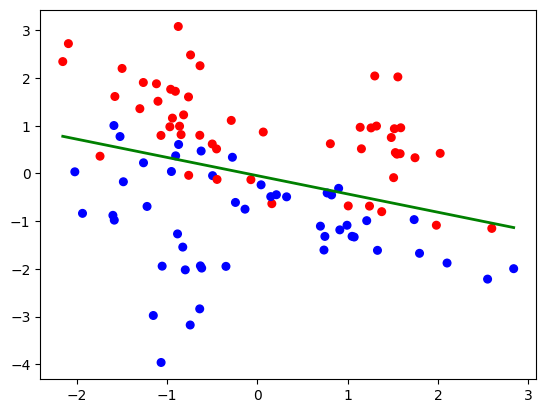

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.scatter(x.values[:,0], x.values[:,1], c=y.values, cmap='bwr', s=30)

# Weights and bias
w = model.model[0].weight.detach().numpy()[0]
b = model.model[0].bias.detach().numpy()[0]

# Decision boundary
x1 = np.linspace(x.values[:,0].min(), x.values[:,0].max(), 100)
x2 = -(w[0]*x1 + b)/w[1]

plt.plot(x1, x2, color='green', linewidth=2)
plt.show()
